In [1]:
import pandas as pd
import matplotlib

#reading each xlsx and changing columns to match to then concat
df2014 = pd.read_excel('data/ttc-streetcar-delay-data-2014.xlsx')
df2015 = pd.read_excel('data/ttc-streetcar-delay-data-2015.xlsx')
df2016 = pd.read_excel('data/ttc-streetcar-delay-data-2016.xlsx')
df2017 = pd.read_excel('data/ttc-streetcar-delay-data-2017.xlsx')
df2018 = pd.read_excel('data/ttc-streetcar-delay-data-2018.xlsx')
df2019 = pd.read_excel('data/ttc-streetcar-delay-data-2019.xlsx')
df2020 = pd.read_excel('data/ttc-streetcar-delay-data-2020_final.xlsx').rename(columns={'Delay':'Min Delay',
                                                                                  'Gap':'Min Gap'})
df2021 = pd.read_excel('data/ttc-streetcar-delay-data-jan-2021-to-august-2021.xlsx').rename(columns={'Bound':'Direction',
                                                                                               'Date':'Report Date',
                                                                                               'Line':'Route'})

df2014['Time'] = pd.to_datetime(df2014['Time'], format='%H:%M:%S').dt.time
df2015['Time'] = pd.to_datetime(df2015['Time'], format='%H:%M:%S').dt.time
df2016['Time'] = pd.to_datetime(df2016['Time'], format='%H:%M:%S').dt.time
df2017['Time'] = pd.to_datetime(df2017['Time'], format='%H:%M:%S').dt.time
df2018['Time'] = pd.to_datetime(df2018['Time'], format='%H:%M:%S').dt.time
df2019['Time'] = pd.to_datetime(df2019['Time'], format='%H:%M:%S').dt.time
df2020['Time'] = pd.to_datetime(df2020['Time'], format='%H:%M:%S').dt.time
df2021['Time'] = pd.to_datetime(df2021['Time'], format='%H:%M:%S').dt.time

frames = [df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021]
df_all = pd.concat(frames)

In [2]:
df_all = df_all.rename(columns={'Report Date':'Report_Date','Min Delay':'Min_Delay','Min Gap':'Min_Gap',
                       'Round Time':'Round_Time'})
df_all

,Report_Date,Route,Time,Day,Location,Incident,Min_Delay,Min_Gap,Direction,Vehicle,Round_Time
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0,06:30:00
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0,12:30:00
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0,14:00:00
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0,14:30:00
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0,16:30:00
...,...,...,...,...,...,...,...,...,...,...,...
1013,2021-01-31,501,22:43:00,Sunday,QUEEN AND BROADVIEW,Emergency Services,11.0,21.0,W,4579.0,22:30:00
1014,2021-01-31,504,00:15:00,Sunday,KING AND SPADINA,Mechanical,3.0,8.0,W,4461.0,00:30:00
1015,2021-01-31,510,00:41:00,Sunday,SPADINA STATION,Emergency Services,20.0,30.0,NaN,4603.0,00:30:00
1016,2021-01-31,501,00:46:00,Sunday,QUEEN AND CHURCH,Held By,13.0,23.0,W,4432.0,01:00:00


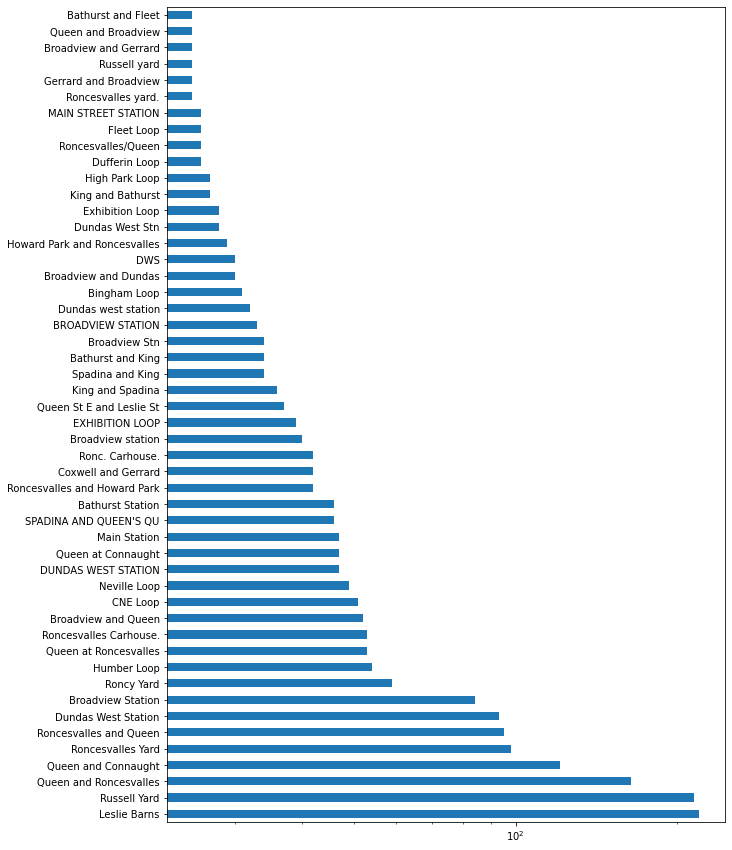

In [3]:
ax = df_all.Location.value_counts().nlargest(50).plot(kind='barh', figsize=(10,15))
ax.set_xscale('log')

In [4]:
df_all.groupby('Incident')['Min_Delay'].sum().sort_values(ascending=False)

Incident
Mechanical                  33239.0
Held By                     19725.0
Investigation               16716.0
Late Leaving Garage          8298.0
Emergency Services           6086.0
General Delay                4695.0
Diversion                    3196.0
Operations                   2353.0
Utilized Off Route           2100.0
Cleaning                     1448.0
Security                      784.0
Overhead                      440.0
Overhead - Pantograph         195.0
Collision - TTC Involved      173.0
Late                          119.0
Rail/Switches                  50.0
Name: Min_Delay, dtype: float64

In [5]:
df_all['Round_Time'] = df_all['Round_Time'].astype(str)
df_all.groupby('Round_Time')['Min_Delay'].sum().sort_values(ascending=False)

Round_Time
06:00:00               5701.0
05:30:00               4551.0
06:30:00               4159.0
07:00:00               3412.0
09:30:00               3293.0
08:00:00               3065.0
14:30:00               2920.0
13:30:00               2899.0
17:00:00               2841.0
19:00:00               2746.0
15:00:00               2727.0
13:00:00               2587.0
18:30:00               2494.0
16:30:00               2490.0
16:00:00               2472.0
08:30:00               2308.0
07:30:00               2273.0
10:30:00               2198.0
14:00:00               2180.0
15:30:00               2124.0
17:30:00               2115.0
12:00:00               2100.0
20:00:00               2007.0
23:00:00               1961.0
09:00:00               1949.0
21:00:00               1934.0
19:30:00               1878.0
10:00:00               1828.0
20:30:00               1778.0
12:30:00               1663.0
18:00:00               1614.0
11:30:00               1568.0
05:00:00               1552.0

In [6]:
df_all.groupby('Location')['Min_Delay'].sum().sort_values(ascending=False).nlargest(50)

Location
Leslie Barns                             3579.0
Russell Yard                             1255.0
Queen and Roncesvalles                    928.0
Queen and Connaught                       776.0
Dundas West Station                       747.0
Queen and Broadview                       678.0
Roncesvalles Yard                         602.0
King and Dufferin                         558.0
Roncesvalles and Queen                    544.0
Roncy Yard                                542.0
Broadview Station                         534.0
king and spadina eb, kingand yirk wb      529.0
Union Station                             513.0
Spadina @ Dundas                          506.0
Neville Loop                              496.0
Humber Loop                               495.0
St. Clair and Dufferin                    492.0
Bathurst and Fleet                        488.0
Queens Quay and Spadina                   462.0
Oakwood to Gunns Loop both directions     458.0
Dundas and Victoria            

In [7]:
df_all.groupby('Day')['Min_Delay'].sum().sort_values(ascending=False)

Day
Tuesday      16406.0
Friday       15378.0
Wednesday    15295.0
Thursday     15217.0
Monday       12875.0
Saturday     12517.0
Sunday       11929.0
Name: Min_Delay, dtype: float64

In [8]:
time_delay = df_all.groupby('Round_Time')['Min_Delay'].sum()
std = time_delay.std()
mean = time_delay.mean()
print('The mean is %s and standard deviation is %g' %(mean, std))

The mean is 2033.0 and standard deviation is 1047.77


In [9]:
df_agg = df_all.groupby(['Day','Incident']).agg({'Min_Delay':sum})
g = df_agg['Min_Delay'].groupby('Day', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(5))
pd.DataFrame(res)

Min_Delay
Day       Incident                      
Friday    Mechanical              5188.0
          Investigation           2565.0
          Held By                 2173.0
          Late Leaving Garage     1667.0
          Emergency Services      1145.0
Monday    Mechanical              5073.0
          Held By                 2696.0
          Investigation           2000.0
          Late Leaving Garage      851.0
          General Delay            703.0
Saturday  Mechanical              3942.0
          Held By                 2190.0
          Investigation           2149.0
          Diversion                823.0
          General Delay            743.0
Sunday    Mechanical              3083.0
          Investigation           2318.0
          Held By                 2305.0
          Diversion               1235.0
          Late Leaving Garage     1018.0
Thursday  Mechanical              4878.0
          Held By                 3216.0
          Investigation           2897.0
          Late Leaving Garage     2095.0
          General Delay            534.0
Tuesday   Mechanical              5790.0
          Held By                 3409.0
          Investigation           2868.0
          Emergency Services      1340.0
          Late Leaving Garage     1151.0
Wednesday Mechanical              5285.0
          Held By                 3736.0
          Investigation           1919.0
          Emergency Services      1055.0
          General Delay            880.0

In [10]:
df = df_all

def clean_text(text):
    text = text.lower()
    text = text.replace(" ", "_")
    return text

df['Location'] = df['Location'].astype(str).apply(clean_text)
df['Incident'] = df['Incident'].astype(str).apply(clean_text)
df

,Report_Date,Route,Time,Day,Location,Incident,Min_Delay,Min_Gap,Direction,Vehicle,Round_Time
0,2014-01-02,505,06:31:00,Thursday,dundas_and_roncesvalles,late_leaving_garage,4.0,8.0,E/B,4018.0,06:30:00
1,2014-01-02,504,12:43:00,Thursday,king_and_shaw,utilized_off_route,20.0,22.0,E/B,4128.0,12:30:00
2,2014-01-02,501,14:01:00,Thursday,kingston_road_and_bingham,held_by,13.0,19.0,W/B,4016.0,14:00:00
3,2014-01-02,504,14:22:00,Thursday,king_st._and_roncesvalles_ave.,investigation,7.0,11.0,W/B,4175.0,14:30:00
4,2014-01-02,504,16:42:00,Thursday,king_and_bathurst,utilized_off_route,3.0,6.0,E/B,4080.0,16:30:00
...,...,...,...,...,...,...,...,...,...,...,...
1013,2021-01-31,501,22:43:00,Sunday,queen_and_broadview,emergency_services,11.0,21.0,W,4579.0,22:30:00
1014,2021-01-31,504,00:15:00,Sunday,king_and_spadina,mechanical,3.0,8.0,W,4461.0,00:30:00
1015,2021-01-31,510,00:41:00,Sunday,spadina_station,emergency_services,20.0,30.0,NaN,4603.0,00:30:00
1016,2021-01-31,501,00:46:00,Sunday,queen_and_church,held_by,13.0,23.0,W,4432.0,01:00:00


In [11]:
import sys
import numpy as np
#np.set_printoptions(threshold=10)
np.set_printoptions(threshold=sys.maxsize)

column_values = df[["Incident"]].values.ravel()
unique_values =  pd.unique(column_values)
unique_values

array(['late_leaving_garage', 'utilized_off_route', 'held_by',
       'investigation', 'mechanical', 'general_delay',
       'emergency_services', 'diversion', 'overhead_-_pantograph',
       'operations', 'cleaning', 'late', 'security', 'overhead',
       'collision_-_ttc_involved', 'rail/switches'], dtype=object)

In [26]:
df_all.to_csv('ttc-data.csv', index=False)

In [23]:
df.head()

,Report_Date,Route,Time,Day,Location,Incident,Min_Delay,Min_Gap,Direction,Vehicle,Round_Time
0,2014-01-02,505,06:31:00,Thursday,dundas_and_roncesvalles,late_leaving_garage,4.0,8.0,E/B,4018.0,06:30:00
1,2014-01-02,504,12:43:00,Thursday,king_and_shaw,utilized_off_route,20.0,22.0,E/B,4128.0,12:30:00
2,2014-01-02,501,14:01:00,Thursday,kingston_road_and_bingham,held_by,13.0,19.0,W/B,4016.0,14:00:00
3,2014-01-02,504,14:22:00,Thursday,king_st._and_roncesvalles_ave.,investigation,7.0,11.0,W/B,4175.0,14:30:00
4,2014-01-02,504,16:42:00,Thursday,king_and_bathurst,utilized_off_route,3.0,6.0,E/B,4080.0,16:30:00
